## Final Project Submission

Please fill out:
* Student name: Jessee Waweru Maina
* Student pace: part time
* Scheduled project review date/time: 3rd August 23:59 
* Instructor name: Noah Kandie
* Blog post URL:https://github.com/Jessee-M/Microsoft-Movie-Analysis.git 


In [1120]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

#  Overview

This project explores how Microsoft can successfully enter the movie industry by identifying what types of films perform best at the box office. Using data from IMDB and Box Office, I conducted a descriptive analysis of movie genres, ratings, and revenue trends. The goal was to uncover patterns in film success that could guide Microsoft’s new movie studio in making data-smart decisions.

# Business Problem

With so many tech and media giants moving into original content production, Microsoft would like to explore the movie industry too. They plan to launch a new movie studio and I have been assigned to analyze current trends in the film market and give a report to bring clarity in the best genres to invest in. My goal was to find out what types of movies are performing best at the box office — and use that data to offer clear, practical recommendations that will help guide their content strategy.

# Data

The data used in this project is sourced from IMDb and Box Office, two of the most comprehensive repositories for film and television data. IMDb provides detailed metadata for each title, including runtime, genres, release year, average audience ratings, and number of votes. Box Office complements this with financial data, offering figures on domestic gross, foreign gross, and total box office revenue.

# Methods

This project uses descriptive analysis, including trend evaluations and performance summaries, to explore Microsoft Studio's film production data. By analyzing revenue patterns, genre performance, and content characteristics, the study provides strategic insights into which types of films drive the highest returns. This overview enables data-informed decisions regarding content investment, resource allocation, and market positioning to enhance the studio’s competitive advantage in the entertainment industry

# Results

# Exploring characteristics of various Movies

In [1121]:
imdb_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv/title.basics.csv')

In [1122]:
imdb_title_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [1123]:
imdb_title_basics.drop('start_year',axis = 1,inplace = True)#Since it is inaccurate!!

In [1124]:
imdb_title_basics.isna().sum()

tconst                 0
primary_title          0
original_title        21
runtime_minutes    31739
genres              5408
dtype: int64

- Let's clean the data by getting rid of the missing values

In [1125]:
imdb_title_basics.dropna(subset=['genres'], inplace=True)

- Filling the missing runtime data with the median according to categories would give an accurate dataset for runtime so let's do so.

In [1126]:
imdb_title_basics['runtime_minutes'] = imdb_title_basics.groupby('genres')['runtime_minutes'].transform(lambda x: x.fillna(x.median()))



C:\Users\Jess\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [1127]:
imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140736 entries, 0 to 146143
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           140736 non-null  object 
 1   primary_title    140736 non-null  object 
 2   original_title   140734 non-null  object 
 3   runtime_minutes  140679 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), object(4)
memory usage: 6.4+ MB


- Since there are still minimal missing values,we can drop rows that have mising values

In [1128]:
imdb_title_basics = imdb_title_basics.dropna()
imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140677 entries, 0 to 146143
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           140677 non-null  object 
 1   primary_title    140677 non-null  object 
 2   original_title   140677 non-null  object 
 3   runtime_minutes  140677 non-null  float64
 4   genres           140677 non-null  object 
dtypes: float64(1), object(4)
memory usage: 6.4+ MB


- We can set the title as the index inorder to make it easy to join dataframes

In [1129]:
imdb_title_basics.set_index('primary_title',inplace = True)
imdb_title_basics

,tconst,original_title,runtime_minutes,genres
primary_title,,,,
Sunghursh,tt0063540,Sunghursh,175.0,"Action,Crime,Drama"
One Day Before the Rainy Season,tt0066787,Ashad Ka Ek Din,114.0,"Biography,Drama"
The Other Side of the Wind,tt0069049,The Other Side of the Wind,122.0,Drama
Sabse Bada Sukh,tt0069204,Sabse Bada Sukh,93.0,"Comedy,Drama"
The Wandering Soap Opera,tt0100275,La Telenovela Errante,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...
Safeguard,tt9916190,Safeguard,90.0,"Drama,Thriller"
Kuambil Lagi Hatiku,tt9916538,Kuambil Lagi Hatiku,123.0,Drama
Rodolpho Teóphilo - O Legado de um Pioneiro,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,71.0,Documentary


# To determine the gross revenue of movies

In [1130]:
gross_earnings = pd.read_csv('zippedData/bom.movie_gross.csv/bom.movie_gross.csv')

In [1131]:
gross_earnings

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


Let's look at the structure of the dataframe

In [1132]:
gross_earnings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [1133]:
gross_earnings.loc[:,'foreign_gross'] = gross_earnings['foreign_gross'].astype(str)
gross_earnings.loc[:, 'foreign_gross'] = pd.to_numeric(gross_earnings['foreign_gross'].str.replace(',', ''),errors='coerce')

In [1134]:
gross_earnings['domestic_gross'].isna().sum()

28

In [1135]:
gross_earnings['foreign_gross'].isna().sum()

1350

Since some of the rows are missing the foreign gross revenue,let's copy the domestic gross of these rows and set it as the foreign gross then drop the remaining rows with missing values.

In [1136]:
gross_earnings.loc[:,'foreign_gross'] = gross_earnings['foreign_gross'].fillna(gross_earnings['domestic_gross'])
gross_earnings = gross_earnings.dropna()

In [1137]:

gross_earnings

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,4800.0,2018
3384,El Pacto,Sony,2500.0,2500.0,2018
3385,The Swan,Synergetic,2400.0,2400.0,2018


Next let's find the total gross revunue made by each movie in Box Office

In [1138]:
gross_earnings['foreign_gross'].astype('float64')

0       652000000.0
1       691300000.0
2       664300000.0
3       535700000.0
4       513900000.0
           ...     
3382         6200.0
3383         4800.0
3384         2500.0
3385         2400.0
3386         1700.0
Name: foreign_gross, Length: 3356, dtype: float64

In [1139]:
gross_earnings.loc[:,'total_gross'] = gross_earnings['domestic_gross'] + gross_earnings['foreign_gross']
gross_earnings

C:\Users\Jess\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Jess\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,6200.0,2018,1.240000e+04
3383,Edward II (2018 re-release),FM,4800.0,4800.0,2018,9.600000e+03
3384,El Pacto,Sony,2500.0,2500.0,2018,5.000000e+03
3385,The Swan,Synergetic,2400.0,2400.0,2018,4.800000e+03


Setting the title as the index enables us to join this dataframe with the imdb title basics dataframe with ease

In [1140]:
gross_earnings.set_index('title',inplace = True)
gross_earnings

,studio,domestic_gross,foreign_gross,year,total_gross
title,,,,,
Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...
The Quake,Magn.,6200.0,6200.0,2018,1.240000e+04
Edward II (2018 re-release),FM,4800.0,4800.0,2018,9.600000e+03
El Pacto,Sony,2500.0,2500.0,2018,5.000000e+03


# Making a dataframe for use in analysis of gross revenue per movie

In [1141]:
joined_df1 = gross_earnings.join(imdb_title_basics,how = 'inner')
joined_df1

,studio,domestic_gross,foreign_gross,year,total_gross,tconst,original_title,runtime_minutes,genres
'71,RAtt.,1300000.0,355000.0,2015,1.655000e+06,tt2614684,'71,99.0,"Action,Drama,Thriller"
"1,000 Times Good Night",FM,53900.0,53900.0,2014,1.078000e+05,tt2353767,Tusen ganger god natt,117.0,"Drama,War"
10 Cloverfield Lane,Par.,72100000.0,38100000.0,2016,1.102000e+08,tt1179933,10 Cloverfield Lane,103.0,"Drama,Horror,Mystery"
10 Years,Anch.,203000.0,203000.0,2012,4.060000e+05,tt1715873,10 Years,100.0,"Comedy,Drama,Romance"
1001 Grams,KL,11000.0,11000.0,2015,2.200000e+04,tt3346824,1001 Gram,93.0,Drama
...,...,...,...,...,...,...,...,...,...
Zindagi Na Milegi Dobara,Eros,3100000.0,3100000.0,2011,6.200000e+06,tt1562872,Zindagi Na Milegi Dobara,155.0,"Comedy,Drama"
Zombeavers,Free,14900.0,14900.0,2015,2.980000e+04,tt2784512,Zombeavers,77.0,"Action,Adventure,Comedy"
Zookeeper,Sony,80400000.0,89500000.0,2011,1.699000e+08,tt1222817,Zookeeper,102.0,"Comedy,Family,Romance"
Zoolander 2,Par.,28800000.0,27900000.0,2016,5.670000e+07,tt1608290,Zoolander 2,101.0,Comedy


# Assigning Each Movie It's Rating

In [1142]:
ratings = pd.read_csv('zippedData/title.ratings.csv')
ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [1143]:
ratings.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

- The Dataframe has no missing values thus is ready for use.Setting tconst as the index enables joining to joined_df1.

In [1144]:
ratings.set_index('tconst',inplace = True)
ratings

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21
...,...,...
tt9805820,8.1,25
tt9844256,7.5,24
tt9851050,4.7,14


# Making a larger Dataframe to use for analysing ratings of movies

- In order to get a broader scope of the data we have,lets join only the imdb_title_basics dataframe and the ratings dataframe to get more entries to work with .This will allow us to get ratings of more moives in the dataframes.

In [1145]:
imdb_title_basics.set_index('tconst',inplace = True)
cor_of_runtime_and_ratings = imdb_title_basics.join(ratings,how='inner')
cor_of_runtime_and_ratings

,original_title,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,
tt0063540,Sunghursh,175.0,"Action,Crime,Drama",7.0,77
tt0066787,Ashad Ka Ek Din,114.0,"Biography,Drama",7.2,43
tt0069049,The Other Side of the Wind,122.0,Drama,6.9,4517
tt0069204,Sabse Bada Sukh,93.0,"Comedy,Drama",6.1,13
tt0100275,La Telenovela Errante,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...
tt9913056,Swarm Season,86.0,Documentary,6.2,5
tt9913084,Diabolik sono io,75.0,Documentary,6.2,6
tt9914286,Sokagin Çocuklari,98.0,"Drama,Family",8.7,136


- Removing rows with less than the median number of votes would give us more accurate data and more clear visualizations too.

In [1146]:
cor_of_runtime_and_ratings = cor_of_runtime_and_ratings[cor_of_runtime_and_ratings['numvotes'] >= cor_of_runtime_and_ratings['numvotes'].median()]

This dataframe is now ready for analysis

# Joining the new dataframe 'rating' with the other dataframes

In [1147]:
joined_df1.set_index('tconst',inplace = True)
joined_df1

,studio,domestic_gross,foreign_gross,year,total_gross,original_title,runtime_minutes,genres
tconst,,,,,,,,
tt2614684,RAtt.,1300000.0,355000.0,2015,1.655000e+06,'71,99.0,"Action,Drama,Thriller"
tt2353767,FM,53900.0,53900.0,2014,1.078000e+05,Tusen ganger god natt,117.0,"Drama,War"
tt1179933,Par.,72100000.0,38100000.0,2016,1.102000e+08,10 Cloverfield Lane,103.0,"Drama,Horror,Mystery"
tt1715873,Anch.,203000.0,203000.0,2012,4.060000e+05,10 Years,100.0,"Comedy,Drama,Romance"
tt3346824,KL,11000.0,11000.0,2015,2.200000e+04,1001 Gram,93.0,Drama
...,...,...,...,...,...,...,...,...
tt1562872,Eros,3100000.0,3100000.0,2011,6.200000e+06,Zindagi Na Milegi Dobara,155.0,"Comedy,Drama"
tt2784512,Free,14900.0,14900.0,2015,2.980000e+04,Zombeavers,77.0,"Action,Adventure,Comedy"
tt1222817,Sony,80400000.0,89500000.0,2011,1.699000e+08,Zookeeper,102.0,"Comedy,Family,Romance"


- Setting the index to 'tsonst' to enables us to join rating dataframe to the other dataframes

In [1148]:
final_df = joined_df1.join(ratings,how = 'inner')
final_df

,studio,domestic_gross,foreign_gross,year,total_gross,original_title,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,,,,
tt0315642,Relbig.,1100000.0,1100000.0,2016,2200000.0,Wazir,103.0,"Action,Crime,Drama",7.1,15378
tt0337692,IFC,744000.0,8000000.0,2012,8744000.0,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886
tt0359950,Fox,58200000.0,129900000.0,2013,188100000.0,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,275300
tt0365907,Uni.,26300000.0,26900000.0,2014,53200000.0,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,105116
tt0369610,Uni.,652300000.0,1019.4,2015,652301019.4,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,539338
...,...,...,...,...,...,...,...,...,...,...
tt9392532,Uni.,150200000.0,120500000.0,2014,270700000.0,Neighbors,90.0,"Comedy,Drama",7.6,18
tt9447594,Par.,33700000.0,5600000.0,2014,39300000.0,The Gambler,121.0,"Action,Sci-Fi,Thriller",6.1,10
tt9816988,Wein.,7200000.0,7700000.0,2017,14900000.0,Tala,92.0,Drama,5.2,26


In [1149]:
final_df.reset_index()

,tconst,studio,domestic_gross,foreign_gross,year,total_gross,original_title,runtime_minutes,genres,averagerating,numvotes
0,tt0315642,Relbig.,1100000.0,1100000.0,2016,2200000.0,Wazir,103.0,"Action,Crime,Drama",7.1,15378
1,tt0337692,IFC,744000.0,8000000.0,2012,8744000.0,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886
2,tt0359950,Fox,58200000.0,129900000.0,2013,188100000.0,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,275300
3,tt0365907,Uni.,26300000.0,26900000.0,2014,53200000.0,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,105116
4,tt0369610,Uni.,652300000.0,1019.4,2015,652301019.4,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,539338
...,...,...,...,...,...,...,...,...,...,...,...
2991,tt9392532,Uni.,150200000.0,120500000.0,2014,270700000.0,Neighbors,90.0,"Comedy,Drama",7.6,18
2992,tt9447594,Par.,33700000.0,5600000.0,2014,39300000.0,The Gambler,121.0,"Action,Sci-Fi,Thriller",6.1,10
2993,tt9816988,Wein.,7200000.0,7700000.0,2017,14900000.0,Tala,92.0,Drama,5.2,26
2994,tt9851050,Uni.,87000000.0,18000000.0,2015,105000000.0,Sisters,107.0,"Action,Drama",4.7,14


In [1150]:
final_df

,studio,domestic_gross,foreign_gross,year,total_gross,original_title,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,,,,
tt0315642,Relbig.,1100000.0,1100000.0,2016,2200000.0,Wazir,103.0,"Action,Crime,Drama",7.1,15378
tt0337692,IFC,744000.0,8000000.0,2012,8744000.0,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886
tt0359950,Fox,58200000.0,129900000.0,2013,188100000.0,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,275300
tt0365907,Uni.,26300000.0,26900000.0,2014,53200000.0,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,105116
tt0369610,Uni.,652300000.0,1019.4,2015,652301019.4,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,539338
...,...,...,...,...,...,...,...,...,...,...
tt9392532,Uni.,150200000.0,120500000.0,2014,270700000.0,Neighbors,90.0,"Comedy,Drama",7.6,18
tt9447594,Par.,33700000.0,5600000.0,2014,39300000.0,The Gambler,121.0,"Action,Sci-Fi,Thriller",6.1,10
tt9816988,Wein.,7200000.0,7700000.0,2017,14900000.0,Tala,92.0,Drama,5.2,26


- We now have data we can use the final dataframe which contains all the three dataframes for the next step which is data analysis 

# Data Analysis

### 1.Determining which genres make the most gross profit in Box Office

- Let us group the movie by genres and sort them in ascending order inorder for us to determine the most liked genre and later on create visuals to represent this data.

In [1151]:
grouped_by_genre = final_df.groupby(['genres'])['total_gross'].agg('sum')
sorted_grouped_by_genre = grouped_by_genre.sort_values(ascending = False)
sorted_grouped_by_genre

genres
Action,Adventure,Sci-Fi       2.763830e+10
Adventure,Animation,Comedy    2.763413e+10
Action,Adventure,Fantasy      1.331489e+10
Action,Adventure,Comedy       9.668231e+09
Drama                         6.948296e+09
                                  ...     
Drama,Fantasy,Sci-Fi          3.340000e+04
Documentary,History,News      2.640000e+04
Action,Horror                 1.580000e+04
Drama,War,Western             1.060000e+04
Biography                     8.600000e+03
Name: total_gross, Length: 318, dtype: float64

- Arranging them in desending order will allow us to get the most popular movie and TV_Shows at the top thus making it easy to for us to draw a bar graph

In [1152]:
most_popular = sorted_grouped_by_genre.head(15)
most_popular

genres
Action,Adventure,Sci-Fi       2.763830e+10
Adventure,Animation,Comedy    2.763413e+10
Action,Adventure,Fantasy      1.331489e+10
Action,Adventure,Comedy       9.668231e+09
Drama                         6.948296e+09
Action,Adventure,Thriller     6.600796e+09
Action,Adventure,Animation    6.470206e+09
Action,Adventure,Drama        5.361866e+09
Comedy                        4.844934e+09
Documentary                   3.859329e+09
Action,Thriller               3.820179e+09
Comedy,Drama,Romance          3.583092e+09
Comedy,Romance                3.582622e+09
Action,Crime,Thriller         3.404640e+09
Comedy,Drama                  3.334346e+09
Name: total_gross, dtype: float64

Now we can use this data to make a bar graph that shows the genres that made the most money in Box Office

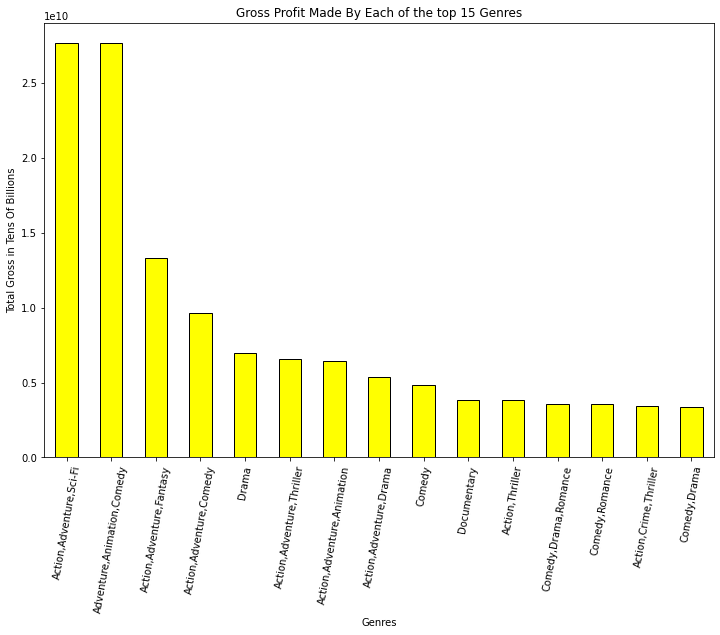

In [1153]:
fig , ax = plt.subplots(figsize = (12,8))
most_popular.plot(kind = 'bar',edgecolor = 'black',color = 'Yellow')
plt.xticks(rotation = 80)
ax.set_title('Gross Profit Made By Each of the top 15 Genres')
ax.set_ylabel('Total Gross in Tens Of Billions')
ax.set_xlabel('Genres');

- As shown in the bar chart above, Action,Adventure and Sci-Fi along with Adventure,Animation, and Comedy movies dominate the movie industry earnig a wooping more than 50 billion dollars in Box Office.

## 2.Which studios produce the most profitable movies?

- Since this new Micrsoft office is new in the movie industry,it would be wise to identify potential competitors or even potential business partners.We can take a look at which studios produce movies and TV_shows that returned the highest profit.

In [1154]:
final_df.sort_values(by = 'total_gross',ascending = False)

,studio,domestic_gross,foreign_gross,year,total_gross,original_title,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,,,,
tt2395427,BV,459000000.0,946400000.0,2015,1.405400e+09,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594
tt1825683,BV,700100000.0,646900000.0,2018,1.347000e+09,Black Panther,134.0,"Action,Adventure,Sci-Fi",7.3,516148
tt2527336,BV,620200000.0,712400000.0,2017,1.332600e+09,Star Wars: Episode VIII - The Last Jedi,152.0,"Action,Adventure,Fantasy",7.1,462903
tt4881806,Uni.,417700000.0,891800000.0,2018,1.309500e+09,Jurassic World: Fallen Kingdom,128.0,"Action,Adventure,Sci-Fi",6.2,219125
tt1323045,BV,400700000.0,875700000.0,2013,1.276400e+09,Frozen,93.0,"Adventure,Drama,Sport",6.2,62311
...,...,...,...,...,...,...,...,...,...,...
tt1384927,Trib.,600.0,600.0,2012,1.200000e+03,Death of a Superhero,97.0,"Animation,Drama",7.1,3234
tt1131724,Magn.,400.0,400.0,2017,8.000000e+02,2:22,98.0,Thriller,5.8,16318
tt8331988,FM,300.0,300.0,2015,6.000000e+02,La camarista,102.0,Drama,7.1,147


In [1155]:
studios = final_df.groupby('studio')['total_gross'].agg('sum')
top_studios = studios.sort_values(ascending = False).head(15)

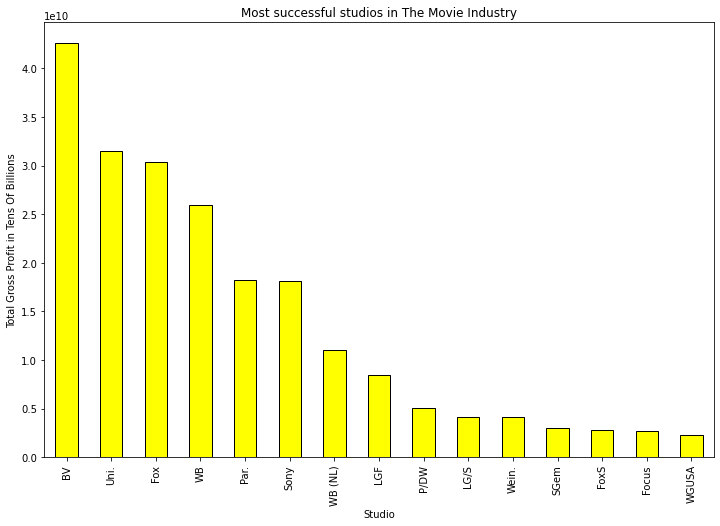

In [1156]:
fig , ax = plt.subplots (figsize = (12,8))
top_studios.plot(kind = 'bar',color = 'yellow',edgecolor = 'black') 
ax.set_title('Most successful studios in The Movie Industry')
ax.set_xlabel('Studio')
ax.set_ylabel('Total Gross Profit in Tens Of Billions');

As seen above,BV Studios makes the most revenue from movies produced with a wooping more than 40 billion dollars in revenue.Universal Studios and FOX Studios follow behind with just over roughly 30 billion dollars in revenue since they started making movies.

## 3. What is the typical runtime of movies and TV_Shows with very high ratings?

Let's get the highest rated movies from the runtime and ratings correlation dataframe and use this data to make a graph

In [1157]:
typical_runtime_of_highly_rated_movies = cor_of_runtime_and_ratings.sort_values(by = ('averagerating'),ascending = False).head(1500)
typical_runtime_of_highly_rated_movies

,original_title,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,
tt9537008,Gini Helida Kathe,138.0,Drama,9.9,417
tt8718580,Eghantham,125.0,Drama,9.7,639
tt9787524,DOSED,82.0,Documentary,9.7,72
tt7131622,Once Upon a Time ... in Hollywood,159.0,"Comedy,Drama",9.7,5600
tt4131686,I Want to Live,106.0,"Adventure,Biography,Documentary",9.6,1339
...,...,...,...,...,...
tt3760060,Amiri's Child,61.0,Drama,8.1,138
tt9905412,Ottam,120.0,Drama,8.1,505
tt3120794,Feng ai,227.0,Documentary,8.1,237


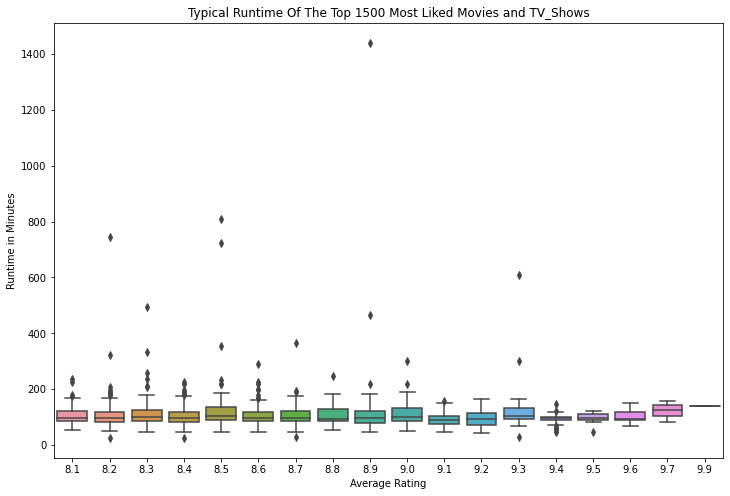

In [1161]:
fig,ax = plt.subplots(figsize=(12,8))
sns.boxplot(data = typical_runtime_of_highly_rated_movies,x = 'averagerating',y = 'runtime_minutes')
ax.set_title('Typical Runtime Of The Top 1500 Most Liked Movies and TV_Shows')
ax.set_ylabel('Runtime in Minutes')
ax.set_xlabel('Average Rating');

As observed from the graph above,most highly rated movies and tv_shows have a runtime of about 50 to 200 minutes.

# Conclusions

This analysis leads to three strategic conclusions:

1. Movies and TV Shows combining Action, Adventure, and Sci-Fi, along with those featuring Adventure, Animation, and Comedy, significantly outperform others in box office revenue. Collectively, these genre combinations have generated over of 50 billion dollars in revenue. This trend highlights a strategic opportunity for the newly formed Mucrosoft Studio to prioritize productions within these genres to maximize chances of financial success.
 
 
2. BV Studios leads the industry in total box office revenue, generating an impressive sum exceeding 40 billion dollars. Trailing behind are Universal Studios and FOX Studios, each amassing over 30 billion dollars in revenue since the inception of their film production operations. This substantial financial performance underscores BV Studios’ consistent success in producing commercially viable content and highlights the competitive positioning of its closest industry peers.



3. The majority of top-rated movies and TV shows tend to have a runtime ranging between 50 and 200 minutes. This suggests that critically acclaimed content typically falls within this duration window, indicating an optimal length that balances narrative depth with viewer engagement. 

# Next Steps For The New Microsoft Studio Office

1. Focus on High-Grossing Genres:

- Action, Adventure, and Sci-Fi films consistently generate the highest box office revenues. The new Microsoft Studio office should prioritize developing and acquiring content within these genres to maximize return on investment and align with market demand.

2. Invest in Strategic Partnerships:
- Given the success of major studios like BV, Universal, and FOX, Microsoft Studio can benefit from forming partnerships with established distributors . This will enhance international reach, especially for foreign markets that contribute significantly to total gross earnings.

3. Optimize Production Lengths for Quality Ratings:
- The analysis shows that highly rated content typically ranges between 50 to 200 minutes in runtime. Microsoft Studio should aim to produce content within this runtime band to appeal to critical audiences while maintaining viewer retention and storytelling efficiency.Movies should not exceed 200 minutes of runtime whereas TV_Shows should aim to reach atleast 40-50 minutes of runtime for storytelling efficiency.